# Pre-Processing wyscout 2017-2018 data to derive Expected Threat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import ast

In [3]:
spain_events=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\wyscout data 17-18\events_Spain.json')

In [4]:
spain_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422
...,...,...,...,...,...,...,...,...,...,...,...,...
628654,8,Simple pass,[{'id': 1801}],20623,"[{'y': 25, 'x': 66}, {'y': 2, 'x': 88}]",2565927,Pass,682,2H,2939.077491,85,253302671
628655,7,Acceleration,[{'id': 1801}],122832,"[{'y': 2, 'x': 88}, {'y': 21, 'x': 97}]",2565927,Others on the ball,682,2H,2940.515560,70,253302673
628656,8,Cross,"[{'id': 401}, {'id': 1802}]",122832,"[{'y': 21, 'x': 97}, {'y': 26, 'x': 92}]",2565927,Pass,682,2H,2942.098761,80,253302674
628657,8,Simple pass,[{'id': 1801}],40756,"[{'y': 74, 'x': 8}, {'y': 56, 'x': 9}]",2565927,Pass,675,2H,2943.089232,85,253302698


In [5]:
spain_events.eventName.unique()

array(['Pass', 'Duel', 'Others on the ball', 'Shot', 'Save attempt',
       'Interruption', 'Free Kick', 'Foul', 'Offside',
       'Goalkeeper leaving line'], dtype=object)

In [9]:
eventId_dict = {1:'duel',2:'Foul',3:'Free Kick',4:'Goalkeeper Leaving Line',5:'Interruption',6:'Offside',7:'Others on the ball',8:'Pass',9:'Save Attempt',10:'Shot'}

In [11]:
tags=spain_events.tags

In [16]:
m=len(spain_events)
is_goal=np.zeros(m)
is_owngoal=np.zeros(m)
is_assist=np.zeros(m)
is_counterattack=np.zeros(m)
is_direct=np.zeros(m)
is_indirect=np.zeros(m)
is_blocked=np.zeros(m)
is_interception=np.zeros(m)
is_clearance=np.zeros(m)
is_slidingtackle=np.zeros(m)
is_accurate=np.zeros(m)
is_inaccurate=np.zeros(m)
is_through=np.zeros(m)


In [17]:
for i in range(len(tags)):
        for j in range(len(tags[i])):
            if tags[i][j]['id']==101:
                is_goal[i]=1
            elif tags[i][j]['id']==102:
                is_owngoal[i]=1
            elif tags[i][j]['id']==301:
                is_assist[i]=1
            elif tags[i][j]['id']==1901:
                is_counterattack[i]=1
            elif tags[i][j]['id']==1101:
                is_direct[i]=1
            elif tags[i][j]['id']==1102:
                is_indirect[i]=1
            elif tags[i][j]['id']==2101:
                is_blocked[i]=1
            elif tags[i][j]['id']==1401:
                is_interception[i]=1
            elif tags[i][j]['id']==1501:
                is_clearance[i]=1
            elif tags[i][j]['id']==1601:
                is_slidingtackle[i]=1
            elif tags[i][j]['id']==1801:
                is_accurate[i]=1
            elif tags[i][j]['id']==1802:
                is_inaccurate[i]=1
            elif tags[i][j]['id']==901:
                is_through[i]=1
            

In [ ]:
del spain_events['eventName']
del spain_events['subEventName']

In [93]:
spain_events['is_owngoal']=spain_events['is_owngoal'].astype(int)
spain_events['is_counterattack']=spain_events['is_counterattack'].astype(int)
spain_events['is_direct']=spain_events['is_direct'].astype(int)
spain_events['is_indirect']=spain_events['is_indirect'].astype(int)
spain_events['is_blocked']=spain_events['is_blocked'].astype(int)
spain_events['is_interception']=spain_events['is_interception'].astype(int)
spain_events['is_clearance']=spain_events['is_clearance'].astype(int)
spain_events['is_slidingtackle']=spain_events['is_slidingtackle'].astype(int)
spain_events['is_accurate']=spain_events['is_accurate'].astype(int)
spain_events['is_inaccurate']=spain_events['is_inaccurate'].astype(int)
spain_events['is_through']=spain_events['is_through'].astype(int)
spain_events['is_goal']=spain_events['is_goal'].astype(int)

In [42]:
spain_events.to_csv('spain_events.csv')

In [92]:
spain_events=pd.read_csv('spain_events.csv')

In [66]:
spain_events

,Unnamed: 0,eventId,tags,playerId,positions,matchId,teamId,matchPeriod,eventSec,subEventId,...,is_interception,is_clearance,is_slidingtackle,is_accurate,is_inaccurate,is_through,x_coord1,x_coord2,y_coord1,y_coord2
0,0,8,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,682,1H,2.994582,85.0,...,0,0,0,1,0,0,38.85,52.50,41.48,34.00
1,1,8,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,682,1H,3.137020,85.0,...,0,0,0,1,0,0,52.50,47.25,34.00,20.40
2,2,8,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,682,1H,6.709668,85.0,...,0,0,0,1,0,0,47.25,39.90,20.40,8.16
3,3,8,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,682,1H,8.805497,85.0,...,0,0,0,1,0,0,39.90,33.60,8.16,46.92
4,4,8,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,682,1H,14.047492,85.0,...,0,0,0,1,0,0,33.60,32.55,46.92,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628654,628654,8,[{'id': 1801}],20623,"[{'y': 25, 'x': 66}, {'y': 2, 'x': 88}]",2565927,682,2H,2939.077491,85.0,...,0,0,0,1,0,0,69.30,92.40,17.00,1.36
628655,628655,7,[{'id': 1801}],122832,"[{'y': 2, 'x': 88}, {'y': 21, 'x': 97}]",2565927,682,2H,2940.515560,70.0,...,0,0,0,1,0,0,92.40,101.85,1.36,14.28
628656,628656,8,"[{'id': 401}, {'id': 1802}]",122832,"[{'y': 21, 'x': 97}, {'y': 26, 'x': 92}]",2565927,682,2H,2942.098761,80.0,...,0,0,0,0,1,0,101.85,96.60,14.28,17.68
628657,628657,8,[{'id': 1801}],40756,"[{'y': 74, 'x': 8}, {'y': 56, 'x': 9}]",2565927,675,2H,2943.089232,85.0,...,0,0,0,1,0,0,8.40,9.45,50.32,38.08


In [37]:
positions=spain_events['positions']
m=len(spain_events)

In [55]:
x_coord1 = np.zeros(m)
y_coord1 = np.zeros(m)
x_coord2 = np.zeros(m)
y_coord2 = np.zeros(m)
for i in range(m):
    temp=ast.literal_eval(positions[i])
    k=len(temp)
    if k==2:
        x_coord1[i]=temp[0]['x']*1.05
        y_coord1[i]=temp[0]['y']*0.68
        x_coord2[i]=temp[1]['x']*1.05
        y_coord2[i]=temp[1]['y']*0.68
    else:
        x_coord1[i]=temp[0]['x']*1.05
        y_coord1[i]=temp[0]['y']*0.68

In [56]:
spain_events['x_coord1']=x_coord1
spain_events['x_coord2']=x_coord2
spain_events['y_coord1']=y_coord1
spain_events['y_coord2']=y_coord2

In [242]:
spain_events.to_csv('spain_events.csv', index=False)

In [70]:
spain_events['x_coord1']=spain_events['x_coord1'].round(decimals=2)
spain_events['x_coord2']=spain_events['x_coord2'].round(decimals=2)
spain_events['y_coord1']=spain_events['y_coord1'].round(decimals=2)
spain_events['y_coord2']=spain_events['y_coord2'].round(decimals=2)

In [75]:
del spain_events['Unnamed: 0']

In [89]:
del spain_events['tags']
del spain_events['positions']


In [163]:
spain_events['eventSec']=spain_events['eventSec']/60
spain_events['eventSec']=spain_events['eventSec'].round(decimals=2)

In [76]:
x_divisions=np.linspace(0,105,21)
x_divisions=np.around(x_divisions,decimals=2)
y_divisions=np.linspace(0,68,16)
y_divisions=np.around(y_divisions,decimals=2)

In [77]:
zones = np.arange(0,((len(x_divisions)-1)*(len(y_divisions)-1)))
zones = np.reshape(zones,(20,15))

In [91]:
def assign_zone(x_coord,y_coord):
    for i in range(len(x_divisions)-1):
        if x_coord < x_divisions[i+1]:
            break
    for j in range(len(y_divisions)-1):
        if y_coord < y_divisions[j+1]:
            break
    return i, j

In [96]:
m = len(spain_events)
zone1=np.zeros(m)
for i in range(m):
    a , b = assign_zone(x_coord1[i],y_coord1[i])
    zone1[i] = zones[a][b]
        

In [97]:
zone1

array([114., 157., 139., ..., 288.,  26.,  23.])

In [98]:
zone2=np.zeros(m)
for i in range(m):
    a , b = assign_zone(x_coord2[i],y_coord2[i])
    zone2[i] = zones[a][b]

In [139]:
spain_events['zone1']=zone1
spain_events['zone2']=zone2

In [140]:
spain_events.columns

Index(['id', 'eventId', 'playerId', 'matchId', 'teamId', 'subEventId',
       'matchPeriod', 'eventSec', 'x_coord1', 'y_coord1', 'x_coord2',
       'y_coord2', 'zone1', 'zone2', 'is_goal', 'is_owngoal',
       'is_counterattack', 'is_direct', 'is_indirect', 'is_blocked',
       'is_interception', 'is_clearance', 'is_slidingtackle', 'is_accurate',
       'is_inaccurate', 'is_through'],
      dtype='object')

In [141]:
spain_events=spain_events[['id','eventId', 'playerId', 'matchId', 'teamId', 'subEventId', 'matchPeriod', 'eventSec',  'x_coord1', 'y_coord1', 'x_coord2', 'y_coord2', 'zone1',
       'zone2',
         'is_goal', 'is_owngoal', 'is_counterattack',
       'is_direct', 'is_indirect', 'is_blocked', 'is_interception',
       'is_clearance', 'is_slidingtackle', 'is_accurate', 'is_inaccurate',
       'is_through']]

In [142]:
spain_events.loc[spain_events['zone1']==100]

,id,eventId,playerId,matchId,teamId,subEventId,matchPeriod,eventSec,x_coord1,y_coord1,...,is_counterattack,is_direct,is_indirect,is_blocked,is_interception,is_clearance,is_slidingtackle,is_accurate,is_inaccurate,is_through
4,180864422,8,3695,2565548,682,85.0,1H,0.23,33.60,46.92,...,0,0,0,0,0,0,0,1,0,0
43,180864450,8,3542,2565548,682,83.0,1H,3.03,33.60,45.56,...,0,0,0,0,0,0,0,0,1,1
105,180864483,8,3542,2565548,682,85.0,1H,7.34,33.60,48.28,...,0,0,0,0,0,0,0,1,0,0
151,180864511,8,399676,2565548,682,85.0,1H,10.28,34.65,46.92,...,0,0,0,0,0,0,0,0,1,0
200,180864548,8,3695,2565548,682,85.0,1H,14.10,33.60,48.96,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628082,253304603,1,0,2565927,682,13.0,2H,18.28,33.60,45.56,...,0,0,0,0,0,0,0,1,0,0
628132,253302086,8,364860,2565927,682,85.0,2H,20.58,32.55,48.28,...,0,0,0,0,0,0,0,1,0,0
628134,253304604,1,0,2565927,682,11.0,2H,20.59,34.65,48.28,...,0,0,0,0,0,0,0,1,0,0
628247,253302190,8,3563,2565927,675,85.0,2H,25.80,34.65,48.96,...,0,0,0,0,0,0,0,1,0,0


## Transition Matrix

In [143]:
Transition_matrix = np.zeros((len(zones)*len(zones[0]),len(zones)*len(zones[0])))

In [144]:
spain_tr = spain_events.loc[(spain_events['eventId']==8)|(spain_events['eventId']==10)]
zones_tr = zones.flatten()

In [145]:

for i in zones_tr:
    for j in zones_tr:
        temp1 = spain_tr.loc[(spain_tr['zone1']==i)&(spain_tr['eventId']==8)]
        denom = len(temp1)
        nume = len(temp1.loc[(temp1['zone2']==j)&(temp1['is_accurate']==1)])
        if denom==0:
            Transition_matrix[i][j] = 0
        else:
            Transition_matrix[i][j]=nume/denom
    

## Move Matrix

In [152]:
move_prob=np.zeros(300)
for i in zones_tr:
    temp1 = spain_tr.loc[(spain_tr['zone1']==i)]
    denom = len(temp1)
    nume = len(temp1.loc[(temp1['eventId']==8)])
    if denom==0:
        move_prob[i]==0
    else:
        move_prob[i]=nume/denom
    

In [153]:
move_prob=np.around(move_prob, decimals=2)

In [154]:
Transition_matrix=np.around(Transition_matrix,decimals=2)

In [ ]:
pd.DataFrame(Transition_matrix).to_csv("Transition.csv", index=False)

In [2]:
with open('Transition_matrix.npy', 'rb') as f:
    Transition_matrix = np.load(f)

In [164]:
heatmap=np.reshape(Transition_matrix[298],(20,15)).T

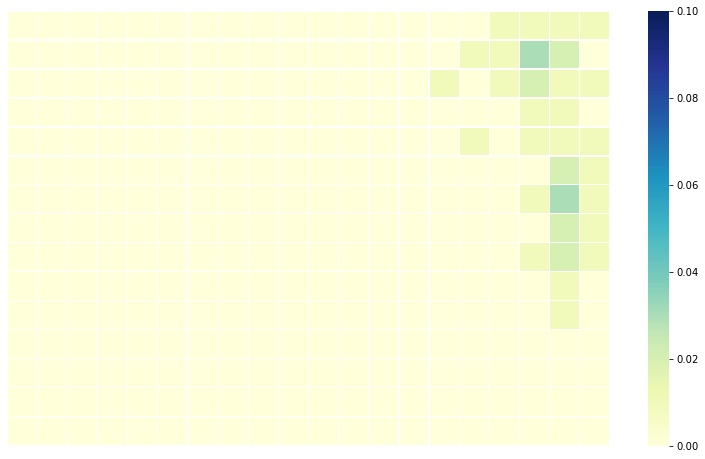

In [165]:
import seaborn as sns
max = np.amax(heatmap)
fig ,ax = plt.subplots(figsize=(13.5,8))
sns.heatmap(heatmap , vmin=0, vmax=0.1, cmap="YlGnBu", linewidths=0.25, xticklabels=False,yticklabels=False)


This is how the transition matrix looks like for a particular zone. The darker shades of green indicate the higher frequency of passes ending up there.

## Goal and Shot Matrix

In [166]:
goal_prob = np.zeros(20*15)
shot_prob = np.zeros(20*15)
for i in zones_tr:
        temp1 = spain_tr.loc[(spain_tr['zone1']==i)]
        denom = len(temp1)
        nume = len(temp1.loc[temp1['eventId']==10])
        if denom==0:
            shot_prob[i] = 0
        else:
            shot_prob[i]=nume/denom
        nume2 = len(temp1.loc[(temp1['eventId']==10)&(temp1['is_goal']==1)])
        if nume==0:
            goal_prob[i]= 0 
        else:
            goal_prob[i]=nume2/nume

In [167]:
shot_prob=np.around(shot_prob, decimals=2)
goal_prob=np.around(goal_prob, decimals=2)

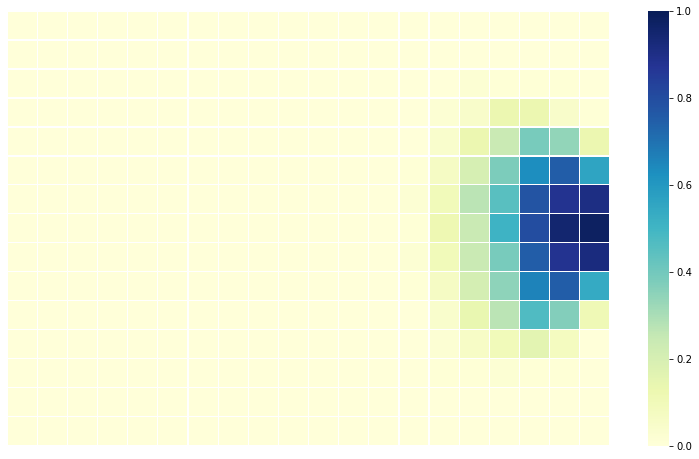

In [196]:
shothmap=np.reshape(shot_prob,(20,15)).T
max = np.amax(shot_prob)
fig ,ax = plt.subplots(figsize=(13.5,8))
sns.heatmap(shothmap , vmin=0, vmax=1, cmap="YlGnBu", linewidths=0.25, xticklabels=False,yticklabels=False)

The darker shades represent higher probability of a shot being taken from there.

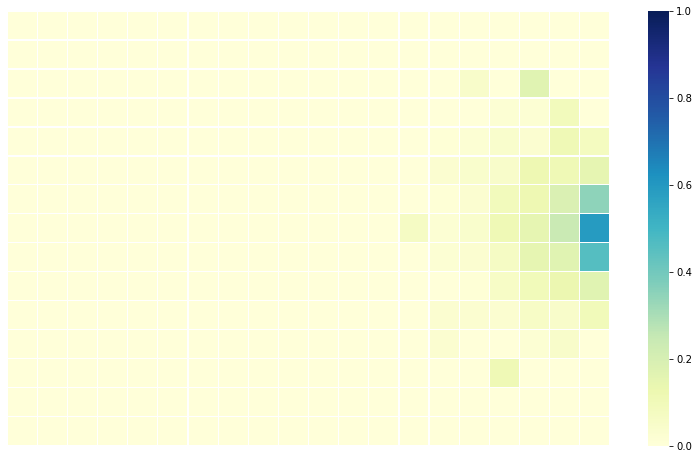

In [202]:
goalhmap=np.reshape(goal_prob,(20,15)).T
max = np.amax(goal_prob)
fig ,ax = plt.subplots(figsize=(13.5,8))
sns.heatmap(goalhmap , vmin=0, vmax=1, cmap="YlGnBu", linewidths=0.25, xticklabels=False,yticklabels=False)

The darker shades represent higher probability of a goal being scored

In [52]:
pd.DataFrame(shot_prob).to_csv("shot_prob.csv")
pd.DataFrame(goal_prob).to_csv("goal_prob.csv")
pd.DataFrame(move_prob).to_csv("move_prob.csv")

In [204]:
with open('move_matrix.npy', 'wb') as f:
     np.save(f,move_prob)

In [205]:
with open('shot_matrix.npy', 'wb') as f:
     np.save(f,shot_prob)

In [206]:
with open('goal_matrix.npy', 'wb') as f:
     np.save(f,goal_prob)

In [207]:
with open('Transition_matrix.npy', 'wb') as f:
     np.save(f,Transition_matrix)

In [210]:
pd.set_option('display.max_columns', None)
spain_events.to_csv('spain_events.csv',index=False)